In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import warnings
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# [TBC] complete your code here with proper comments
# suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:\\Users\\thiba\\Downloads\\red_cross_supply_chain_dataset.csv')
data.head()

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 480 hours (%),Demand coverage after 492 hours (%),Demand coverage after 504 hours (%),Demand coverage after 516 hours (%),Demand coverage after 528 hours (%),Demand coverage after 540 hours (%),Demand coverage after 552 hours (%),Demand coverage after 564 hours (%),Demand coverage after 576 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.258119


In [5]:
data.drop(['Demand coverage after 132 hours (%)',
 'Demand coverage after 144 hours (%)',
 'Demand coverage after 156 hours (%)',
 'Demand coverage after 168 hours (%)',
 'Demand coverage after 180 hours (%)',
 'Demand coverage after 192 hours (%)',
 'Demand coverage after 204 hours (%)',
 'Demand coverage after 216 hours (%)',
 'Demand coverage after 228 hours (%)',
 'Demand coverage after 240 hours (%)',
 'Demand coverage after 252 hours (%)',
 'Demand coverage after 264 hours (%)',
 'Demand coverage after 276 hours (%)',
 'Demand coverage after 288 hours (%)',
 'Demand coverage after 300 hours (%)',
 'Demand coverage after 312 hours (%)',
 'Demand coverage after 324 hours (%)',
 'Demand coverage after 336 hours (%)',
 'Demand coverage after 348 hours (%)',
 'Demand coverage after 360 hours (%)',
 'Demand coverage after 372 hours (%)',
 'Demand coverage after 384 hours (%)',
 'Demand coverage after 396 hours (%)',
 'Demand coverage after 408 hours (%)',
 'Demand coverage after 420 hours (%)',
 'Demand coverage after 432 hours (%)',
 'Demand coverage after 444 hours (%)',
 'Demand coverage after 456 hours (%)',
 'Demand coverage after 468 hours (%)',
 'Demand coverage after 480 hours (%)',
 'Demand coverage after 492 hours (%)',
 'Demand coverage after 504 hours (%)',
 'Demand coverage after 516 hours (%)',
 'Demand coverage after 528 hours (%)',
 'Demand coverage after 540 hours (%)',
 'Demand coverage after 552 hours (%)',
 'Demand coverage after 564 hours (%)',
 'Demand coverage after 576 hours (%)'], axis=1, inplace=True)
data.head()

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Initial DW Inv 17,Initial DW Inv 18,Initial DW Inv 19,Demand coverage after 60 hours (%),Demand coverage after 72 hours (%),Demand coverage after 84 hours (%),Demand coverage after 96 hours (%),Demand coverage after 108 hours (%),Demand coverage after 120 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,16.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,30.0,58.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,1.0,20.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,9.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,20.0,70.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,74.258119


In [6]:
label = data['Readiness (%)']
feature = data.drop(columns='Readiness (%)')

In [7]:
# feature scaling
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)

In [8]:
# Split the dataset into train, validation, and test sets
train_val_feature, test_feature, train_val_label, test_label = train_test_split(
    scaled_feature, label.to_numpy(), test_size = 0.2, random_state = 0
)
train_feature, val_feature, train_label, val_label = train_test_split(
    train_val_feature, train_val_label, test_size = 0.25, random_state = 0
)

In [9]:
# specify the type of data stored in the tensors to avoid incompatiblity
train_ds = TensorDataset(
    torch.tensor(train_feature, dtype = torch.float32),
    torch.tensor(train_label, dtype = torch.float32)
)
val_ds = TensorDataset(
    torch.tensor(val_feature, dtype = torch.float32),
    torch.tensor(val_label, dtype = torch.float32)
)
test_ds = TensorDataset(
    torch.tensor(test_feature, dtype = torch.float32),
    torch.tensor(test_label, dtype = torch.float32)
)

In [10]:
# create the train and test data loaders
batch_size = 16 # usually set to 2 to the nth power
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)
val_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

In [11]:
# get a minibatch from the data loader and print shape of feature and label
for (X, y) in train_dl:
    print(X.shape)
    print(y.shape)
    break

torch.Size([16, 34])
torch.Size([16])


In [12]:
# define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, n_features, n_labels):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_features, 16),
            nn.BatchNorm1d(16), # batch normalization
            nn.Tanh(),
            nn.Dropout(p = 0.5), # dropout with 50% probability
            nn.Linear(16, 8),
            nn.BatchNorm1d(8), # batch normalization
            nn.Tanh(),
            nn.Dropout(p = 0.5), # dropout with 50% probability
            nn.Linear(8, n_labels)
        )
    def forward(self, X):
        return self.net(X)

In [13]:
# create the neural network
model = NeuralNetwork(
    n_features = feature.shape[1],
    n_labels = 1
)

In [14]:
# print network structure and learning parameters
print(f"Model structure:\n{model}\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}")

Model structure:
NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=34, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Tanh()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=8, out_features=1, bias=True)
  )
)

Layer: net.0.weight | Size: torch.Size([16, 34])
Layer: net.0.bias | Size: torch.Size([16])
Layer: net.1.weight | Size: torch.Size([16])
Layer: net.1.bias | Size: torch.Size([16])
Layer: net.4.weight | Size: torch.Size([8, 16])
Layer: net.4.bias | Size: torch.Size([8])
Layer: net.5.weight | Size: torch.Size([8])
Layer: net.5.bias | Size: torch.Size([8])
Layer: net.8.weight | Size: torch.Size([1, 8])
Layer: net.8.bias | Size: torch.Size([1])


In [15]:
# define the training function
def train(train_dl, val_dl, model, loss_fn, optimizer, epochs):
    train_batch_loss_history = [] # for recording the average train loss of a batch
    train_epoch_loss_history = [] # for recording the average train loss of an epoch
    val_batch_loss_history = [] # for recording the average val loss of an batch
    val_epoch_loss_history = [] # for recording the average val loss of an epoch
    model.train()
    
    # start training
    for epoch in range(epochs): # iterate pre-defined number of epoches
        # train set
        train_epoch_loss = 0.0 # initial train epoch loss is set to zero

        for (X, y) in train_dl: # get a batch of training samples
            pred = model(X).squeeze() # forward propagation
            train_batch_loss = loss_fn(pred, y) # compute the current train batch loss
            train_batch_loss.backward() # compute gradients by backpropagation
            optimizer.step() # update learning parameters according to gradients
            optimizer.zero_grad() # reset the gradients to zero
            train_batch_loss_history.append(train_batch_loss.item()) # record current train batch loss
            train_epoch_loss += train_batch_loss.item() # accumulate train batch losses for compute train epoch loss
        train_epoch_loss /= len(train_dl) # compute current train epoch loss
        train_epoch_loss_history.append(train_epoch_loss) # record current train epoch loss
        # validation set
        val_epoch_loss = 0.0 # initial val epoch loss is set to zero
        model.eval() # set the model in evaluation mode
        with torch.no_grad():
            for (X, y) in val_dl: # get a batch of validation samples
                pred = model(X).squeeze() # forward propagation
                val_batch_loss = loss_fn(pred, y) # compute the current val batch loss
                val_batch_loss_history.append(val_batch_loss.item()) # record current val batch loss
                val_epoch_loss += val_batch_loss.item() # accumulate val batch losses for compute val epoch loss
            val_epoch_loss /= len(val_dl) # compute current val epoch loss
            val_epoch_loss_history.append(val_epoch_loss) # record current val epoch loss
        print(f"Epoch {epoch + 1}: train loss = {train_epoch_loss:>5f}, val loss = {val_epoch_loss:>5f}") # print log
    return train_batch_loss_history, val_batch_loss_history, train_epoch_loss_history, val_epoch_loss_history

In [16]:
# define the training hyper-parameters
loss_fn = nn.MSELoss()
learning_rate = 1e-2

optimizer = torch.optim.Adam(
    model.parameters(),
    lr = learning_rate
)
epochs = 500


In [17]:
# train the neural network
train_batch_loss_history, val_batch_loss_history, train_epoch_loss_history, val_epoch_loss_history = train(
    train_dl,
    val_dl,
    model,
    loss_fn,
    optimizer,
    epochs,
)

Epoch 1: train loss = 3228.168062, val loss = 1335.514874
Epoch 2: train loss = 674.425061, val loss = 297.407460
Epoch 3: train loss = 212.767947, val loss = 175.714160
Epoch 4: train loss = 168.183467, val loss = 170.604345
Epoch 5: train loss = 166.697623, val loss = 170.739756
Epoch 6: train loss = 85.545631, val loss = 31.260761
Epoch 7: train loss = 15.921810, val loss = 10.498686
Epoch 8: train loss = 9.705071, val loss = 8.544679
Epoch 9: train loss = 9.258872, val loss = 8.523372
Epoch 10: train loss = 9.319592, val loss = 8.408344
Epoch 11: train loss = 9.086998, val loss = 8.061353
Epoch 12: train loss = 8.649517, val loss = 8.058017
Epoch 13: train loss = 8.661630, val loss = 8.201681
Epoch 14: train loss = 8.789805, val loss = 8.189274
Epoch 15: train loss = 8.759336, val loss = 8.513809
Epoch 16: train loss = 8.592476, val loss = 8.726861
Epoch 17: train loss = 8.539050, val loss = 7.989552
Epoch 18: train loss = 8.515399, val loss = 8.128677
Epoch 19: train loss = 8.5303

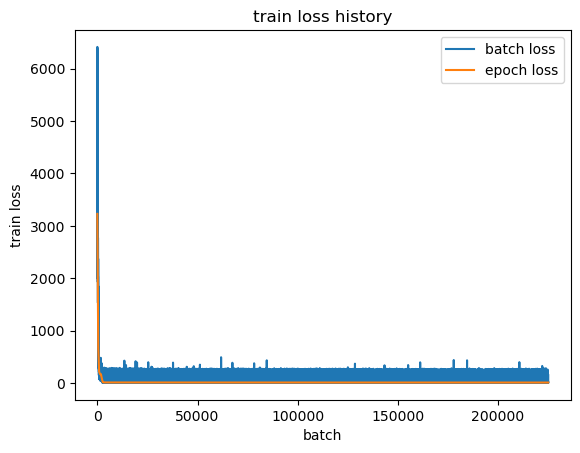

In [18]:
# plot the train loss history
plt.figure()
batch = np.arange(len(train_batch_loss_history))
epoch = np.arange(len(train_epoch_loss_history))
batches_per_epoch = (int(len(train_feature) / batch_size + 1))
plt.plot(batch, train_batch_loss_history, '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, train_epoch_loss_history, '-', label = 'epoch loss')
plt.title('train loss history')
plt.xlabel('batch')
plt.ylabel('train loss')
plt.legend()
plt.show()

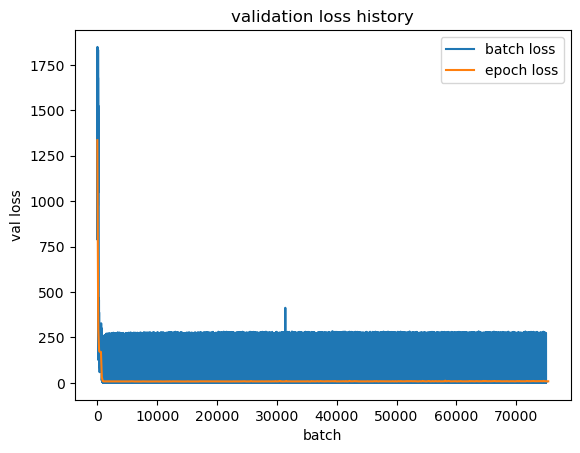

In [19]:
# plot the val loss history
plt.figure()
batch = np.arange(len(val_batch_loss_history))
epoch = np.arange(len(val_epoch_loss_history))
batches_per_epoch = (int(len(val_feature) / batch_size + 1))
plt.plot(batch, val_batch_loss_history, '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, val_epoch_loss_history, '-', label = 'epoch loss')
plt.title('validation loss history')
plt.xlabel('batch')
plt.ylabel('val loss')
plt.legend()
plt.show()

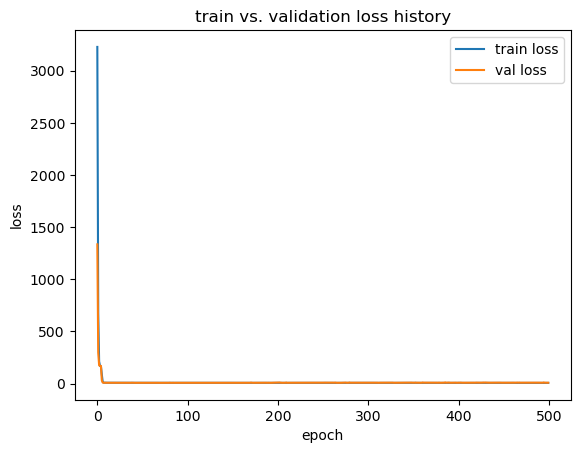

In [20]:
# plot the train vs. val loss history
plt.figure()
plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, '-', label = 'train loss')
plt.plot(np.arange(len(val_epoch_loss_history)), val_epoch_loss_history, '-', label = 'val loss')
plt.title('train vs. validation loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
# save model
file_name = 'ANN-regression-project2.pth'
torch.save(model.state_dict(), file_name)
print('Saved PyTorch Model State to '+ file_name)

Saved PyTorch Model State to ANN-regression-project2.pth


In [22]:
# create the neural network
model = NeuralNetwork(
    n_features = feature.shape[1],
    n_labels = 1
)
model.load_state_dict(torch.load(file_name))

<All keys matched successfully>

In [23]:
# [TBC] complete your code here with proper comments
# define a function to make predictions on test dataset and evaluate the performance
def test(dataloader, model, loss_fn):
    batch_pred_list = [] # for recording batch predictions
    model.eval() # set the model in evaluation mode
    with torch.no_grad(): # disable automatic gradient computing
        loss = 0.0 # set initial test loss to zero
        for (X, y) in dataloader: # get a batch from test samples
            batch_pred = model(X).squeeze() # make predictions, squeeze() reduce `batch_pred` to 1D tensor
            batch_loss = loss_fn(batch_pred, y) # compute current batch loss
            loss += batch_loss.item() # accumulate batch losses for compute test loss
            batch_pred_list.append(batch_pred) # record predictions on current batch
        loss /= len(dataloader) # compute test loss
        pred = np.concatenate(batch_pred_list) # reform the predictions as a numpy 1D array
        print(f"test loss = {loss}") # print log

        # Calculate RMSE
        true_values = np.concatenate([y.numpy() for _, y in dataloader])
        rmse = np.sqrt(mean_squared_error(true_values, pred))

        # Calculate R-squared (r2)
        r2 = r2_score(true_values, pred)

        print(f"RMSE = {rmse}") # print RMSE
        print(f"R-squared = {r2}") # print R-squared

    return pred, loss, rmse, r2


In [24]:
# make prediction on test set and evaluate the performance
test_pred, test_loss, _, _ = test(test_dl, model, loss_fn)

test loss = 8.848596226771672
RMSE = 2.974658966064453
R-squared = 0.9481293063028684


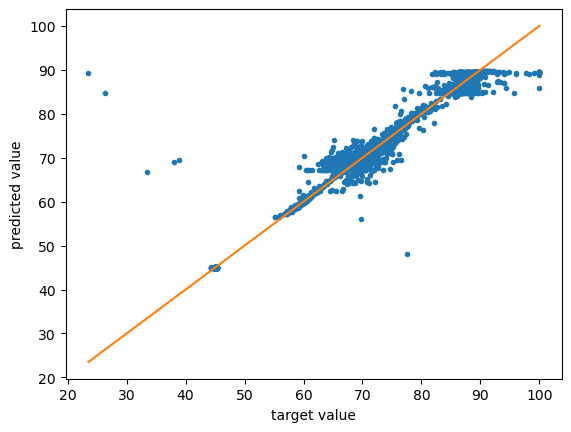

In [25]:
# plot the prediction results of the test dataset
plt.figure()
plt.plot(test_label, test_pred, '.')
plt.plot([min(test_label), max(test_label)], [min(test_label), max(test_label)], '-')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()